In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('aces_2020.csv')
cole = df[df.pitcher==543037]
degrom = df[df.pitcher==594798]

In [105]:
df

,player_name,pitcher,game_date,pitch_type,pitch_name,balls,strikes,release_speed,release_spin_rate,events,...,vx0,vy0,vz0,ax,ay,az,CH,CU,FF,SL
0,Gerrit Cole,543037,2020-09-16,FF,Fastball,0,2,98.9,2530.0,called_strikeout,...,7.803330,-143.585937,-6.780781,-18.029210,35.703050,-11.844341,0,0,1,0
1,Gerrit Cole,543037,2020-09-16,SL,Slider,0,1,89.8,2643.0,swinging_strike,...,5.195386,-130.745592,-5.423125,5.848088,25.906830,-28.194849,0,0,0,1
2,Gerrit Cole,543037,2020-09-16,FF,Fastball,0,0,98.5,2549.0,swinging_strike,...,8.956520,-143.098620,-4.608791,-13.220711,36.181244,-10.775933,0,0,1,0
3,Gerrit Cole,543037,2020-09-16,CH,Changeup,3,2,89.7,1745.0,called_strikeout,...,8.471695,-130.470317,-2.203839,-16.478696,26.523720,-22.194090,1,0,0,0
4,Gerrit Cole,543037,2020-09-16,CH,Changeup,2,2,90.7,1776.0,ball,...,8.510608,-131.651265,-7.331340,-17.395469,28.422109,-21.379415,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,Jacob deGrom,594798,2020-08-03,SL,Slider,2,2,93.6,2648.0,ball,...,4.412996,-136.238536,-7.911766,3.090904,25.956857,-25.059687,0,0,0,1
2334,Jacob deGrom,594798,2020-08-03,SL,Slider,1,2,93.2,2564.0,ball,...,5.201529,-135.713929,-5.982574,2.990389,26.083733,-25.878460,0,0,0,1
2335,Jacob deGrom,594798,2020-08-03,SL,Slider,0,2,94.4,2581.0,ball,...,6.524630,-137.187035,-8.168156,4.989790,29.361796,-27.200873,0,0,0,1
2336,Jacob deGrom,594798,2020-08-03,FF,Fastball,0,1,98.6,2401.0,swinging_strike,...,4.361680,-143.556849,-6.069289,-8.786177,30.618933,-14.031660,0,0,1,0


In [102]:
cole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1203 non-null   object 
 1   pitcher            1203 non-null   int64  
 2   game_date          1203 non-null   object 
 3   pitch_type         1203 non-null   object 
 4   pitch_name         1203 non-null   object 
 5   balls              1203 non-null   int64  
 6   strikes            1203 non-null   int64  
 7   release_speed      1203 non-null   float64
 8   release_spin_rate  1203 non-null   float64
 9   events             1203 non-null   object 
 10  zone               1203 non-null   int64  
 11  release_pos_x      1203 non-null   float64
 12  release_pos_z      1203 non-null   float64
 13  pfx_x              1203 non-null   float64
 14  pfx_z              1203 non-null   float64
 15  plate_x            1203 non-null   float64
 16  plate_z            1203 

In [103]:
degrom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 1203 to 2337
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1135 non-null   object 
 1   pitcher            1135 non-null   int64  
 2   game_date          1135 non-null   object 
 3   pitch_type         1135 non-null   object 
 4   pitch_name         1135 non-null   object 
 5   balls              1135 non-null   int64  
 6   strikes            1135 non-null   int64  
 7   release_speed      1135 non-null   float64
 8   release_spin_rate  1135 non-null   float64
 9   events             1135 non-null   object 
 10  zone               1135 non-null   int64  
 11  release_pos_x      1135 non-null   float64
 12  release_pos_z      1135 non-null   float64
 13  pfx_x              1135 non-null   float64
 14  pfx_z              1135 non-null   float64
 15  plate_x            1135 non-null   float64
 16  plate_z            11

In [4]:
c = cole.groupby('pitch_type')
d = degrom.groupby('pitch_type')

ps = ['CH','CU','FF','SL']
avg_cats = ['release_speed', 'release_spin_rate','pfx_x',
            'pfx_z','vx0','vy0','vz0','ax','ay','az']

agg = pd.concat([c.agg('sum')[ps].sum(axis=1),
                d.agg('sum')[ps].sum(axis=1)], axis=1).rename(columns={0: "Cole", 1: "deGrom"})

cole_mean = c.agg('mean')[avg_cats]
degr_mean = d.agg('mean')[avg_cats]

In [124]:
df['release_speed']

0       98.9
1       89.8
2       98.5
3       89.7
4       90.7
        ... 
2333    93.6
2334    93.2
2335    94.4
2336    98.6
2337    98.3
Name: release_speed, Length: 2338, dtype: float64

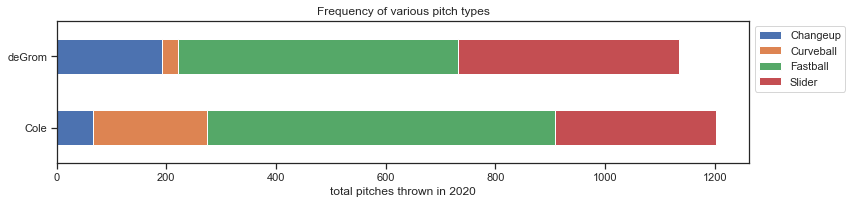

In [60]:
fig, ax = plt.subplots(figsize=(12,3))
agg.T.plot(kind='barh', stacked=True, ax=ax)
ax.legend(['Changeup','Curveball','Fastball','Slider'], bbox_to_anchor=(1, 1))
ax.set_title('Frequency of various pitch types')
ax.set_xlabel('total pitches thrown in 2020')
plt.tight_layout()
plt.savefig('stacked_bar.png')

In [104]:
fig, ax = plt.subplots(figsize=(12, 3))
agg.T.plot(kind='barh', stacked=True, ax=ax)
ax.legend(['Changeup','Curveball','Fastball','Slider'], bbox_to_anchor=(1, 1))
ax.set_title('Frequency of various pitch types')
ax.set_xlabel('total pitches thrown in 2020')
plt.tight_layout()
plt.savefig('stacked_bar.png')

,player_name,pitcher,game_date,pitch_type,pitch_name,balls,strikes,release_speed,release_spin_rate,events,...,vx0,vy0,vz0,ax,ay,az,CH,CU,FF,SL
0,Gerrit Cole,543037,2020-09-16,FF,Fastball,0,2,98.9,2530.0,called_strikeout,...,7.803330,-143.585937,-6.780781,-18.029210,35.703050,-11.844341,0,0,1,0
1,Gerrit Cole,543037,2020-09-16,SL,Slider,0,1,89.8,2643.0,swinging_strike,...,5.195386,-130.745592,-5.423125,5.848088,25.906830,-28.194849,0,0,0,1
2,Gerrit Cole,543037,2020-09-16,FF,Fastball,0,0,98.5,2549.0,swinging_strike,...,8.956520,-143.098620,-4.608791,-13.220711,36.181244,-10.775933,0,0,1,0
3,Gerrit Cole,543037,2020-09-16,CH,Changeup,3,2,89.7,1745.0,called_strikeout,...,8.471695,-130.470317,-2.203839,-16.478696,26.523720,-22.194090,1,0,0,0
4,Gerrit Cole,543037,2020-09-16,CH,Changeup,2,2,90.7,1776.0,ball,...,8.510608,-131.651265,-7.331340,-17.395469,28.422109,-21.379415,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,Gerrit Cole,543037,2020-07-23,FF,Fastball,3,1,96.4,2548.0,field_out,...,7.612632,-140.053500,-9.062853,-16.589153,29.861348,-12.052281,0,0,1,0
1199,Gerrit Cole,543037,2020-07-23,FF,Fastball,2,1,97.4,2545.0,ball,...,9.454831,-141.468423,-6.034522,-12.524080,31.077797,-12.315727,0,0,1,0
1200,Gerrit Cole,543037,2020-07-23,FF,Fastball,1,1,96.2,2508.0,ball,...,4.450856,-140.083750,-2.062146,-15.467609,31.749513,-13.685520,0,0,1,0
1201,Gerrit Cole,543037,2020-07-23,FF,Fastball,1,0,96.3,2442.0,swinging_strike,...,7.014307,-140.046844,-4.869642,-15.279319,30.491723,-14.327472,0,0,1,0


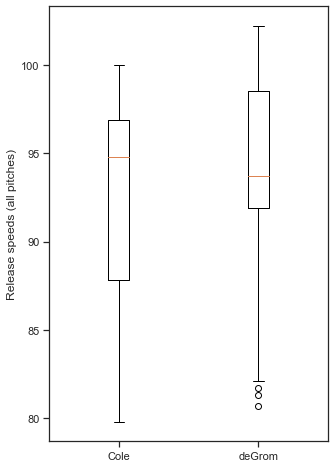

In [150]:
fig, ax = plt.subplots(figsize=(5,8))

ax.set_ylabel('Release speeds (all pitches)')
ax.boxplot([cole.release_speed, degrom.release_speed], labels=['Cole', 'deGrom']);


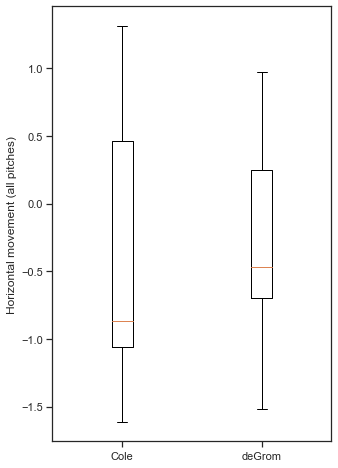

In [151]:
fig, ax = plt.subplots(figsize=(5,8))
ax.set_ylabel('Horizontal movement (all pitches)')
ax.boxplot([cole.pfx_x, degrom.pfx_x], labels=['Cole', 'deGrom']);

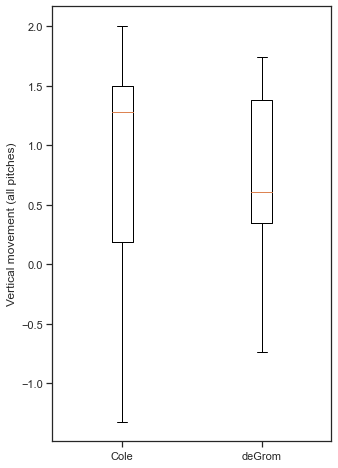

In [152]:
fig, ax = plt.subplots(figsize=(5,8))
ax.set_ylabel('Vertical movement (all pitches)')
ax.boxplot([cole.pfx_z, degrom.pfx_z], labels=['Cole', 'deGrom']);

In [122]:
#Draw a nested boxplot
ax = sns.boxplot(x=df[['release_speed']], y="value", hue="player_name",
                 data=df, linewidth=2.5)

ValueError: Could not interpret input 'value'

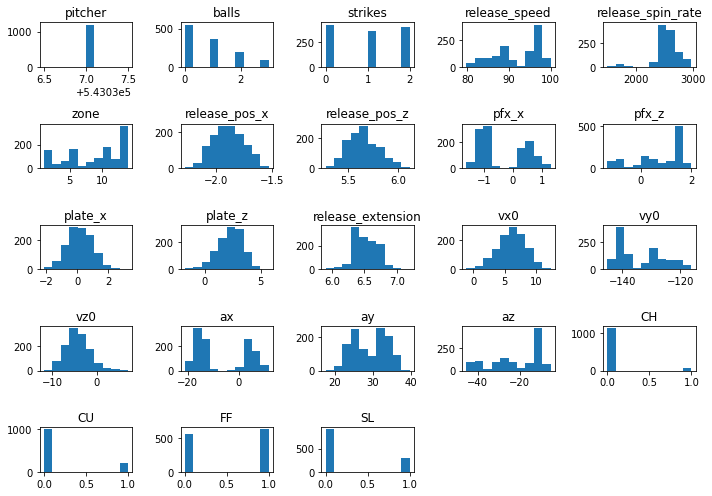

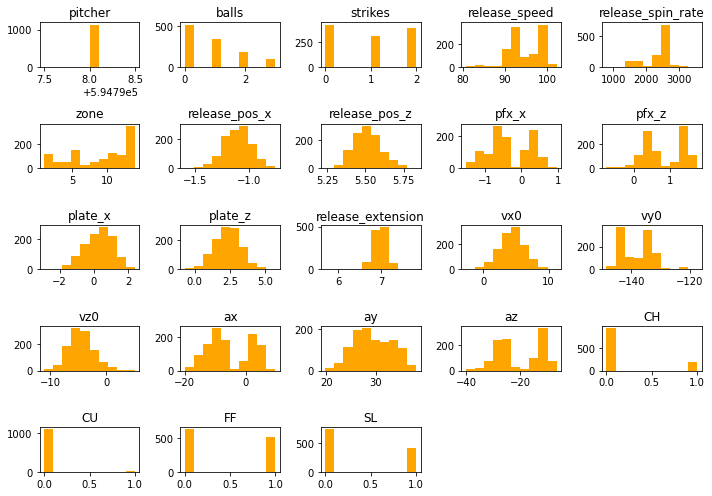

In [6]:
cole.hist(figsize=(10, 7), grid=False)
plt.tight_layout()
degrom.hist(figsize=(10, 7), grid=False, color='orange')
plt.tight_layout()

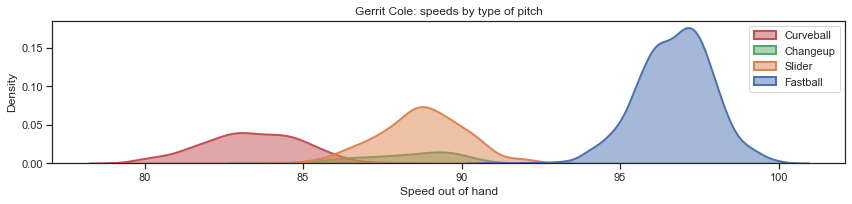

In [90]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Gerrit Cole: speeds by type of pitch')
ax.set_xlabel('Speed out of hand (mph)')
sns.kdeplot(cole.release_speed, hue=cole.pitch_type, fill=True, alpha=.5, linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup','Slider','Fastball'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('cole_speed_density.png')

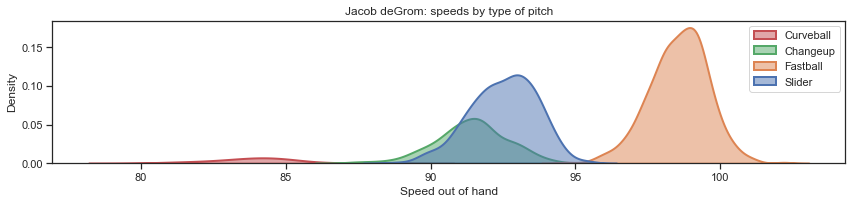

In [91]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Jacob deGrom: speeds by type of pitch')
ax.set_xlabel('Speed out of hand')
sns.kdeplot(degrom.release_speed, hue=degrom.pitch_type, fill=True, alpha=.5,linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup', 'Fastball','Slider'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('degrom_speed_density.png')

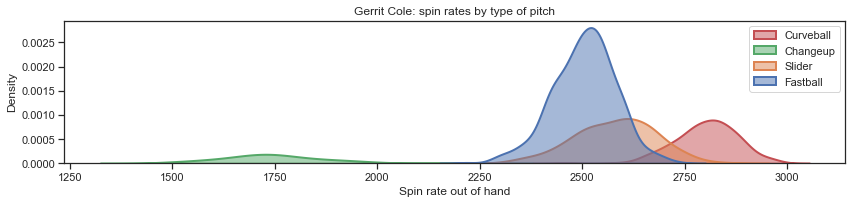

In [92]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Gerrit Cole: spin rates by type of pitch')
ax.set_xlabel('Spin rate out of hand')
sns.kdeplot(cole.release_spin_rate, hue=cole.pitch_type, fill=True, alpha=.5, linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup','Slider','Fastball'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('cole_spin_density.png')

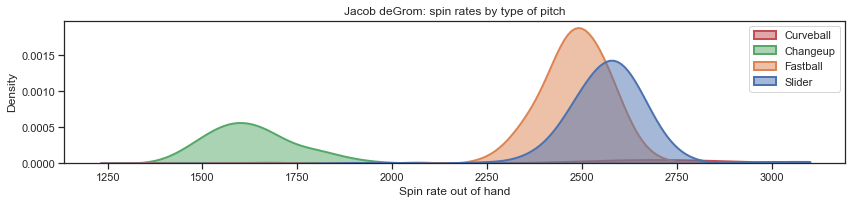

In [96]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Jacob deGrom: spin rates by type of pitch')
ax.set_xlabel('Spin rate out of hand')
sns.kdeplot(degrom.release_spin_rate, hue=degrom.pitch_type, fill=True, alpha=.5, clip=(1230, 3100), linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup', 'Fastball','Slider'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('degrom_spin_density.png')

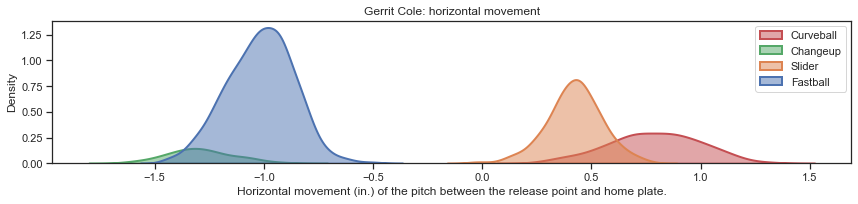

In [99]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Gerrit Cole: horizontal movement')
ax.set_xlabel('Horizontal movement (in.) of the pitch between the release point and home plate.')
sns.kdeplot(cole.pfx_x, hue=cole.pitch_type, fill=True, alpha=.5, linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup','Slider','Fastball'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('cole_lateral_density.png')

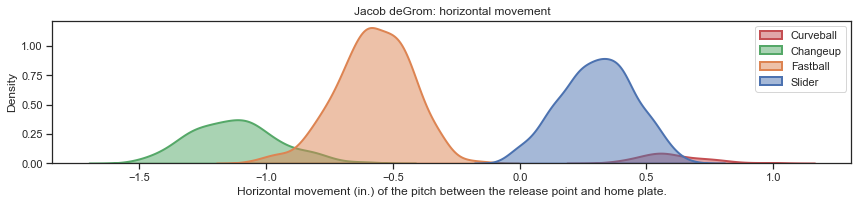

In [101]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
ax.set_title('Jacob deGrom: horizontal movement')
ax.set_xlabel('Horizontal movement (in.) of the pitch between the release point and home plate.')
sns.kdeplot(degrom.pfx_x, hue=degrom.pitch_type, fill=True, alpha=.5, linewidth=2)
#Make sure legend labels are in order
ax.legend(['Curveball','Changeup', 'Fastball','Slider'], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('degrom_lateral_density.png')

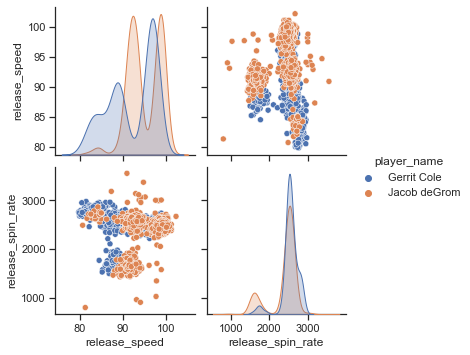

In [18]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(df[['player_name', 'release_speed', 'release_spin_rate']], hue='player_name')

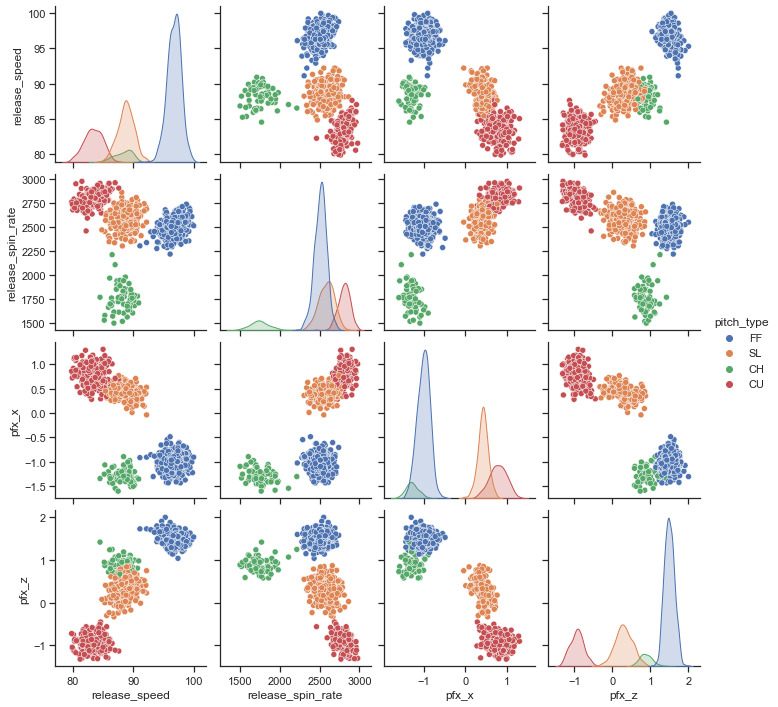

In [15]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(cole[['pitch_type', 'release_speed', 'release_spin_rate', 'pfx_x', 'pfx_z']], hue='pitch_type')

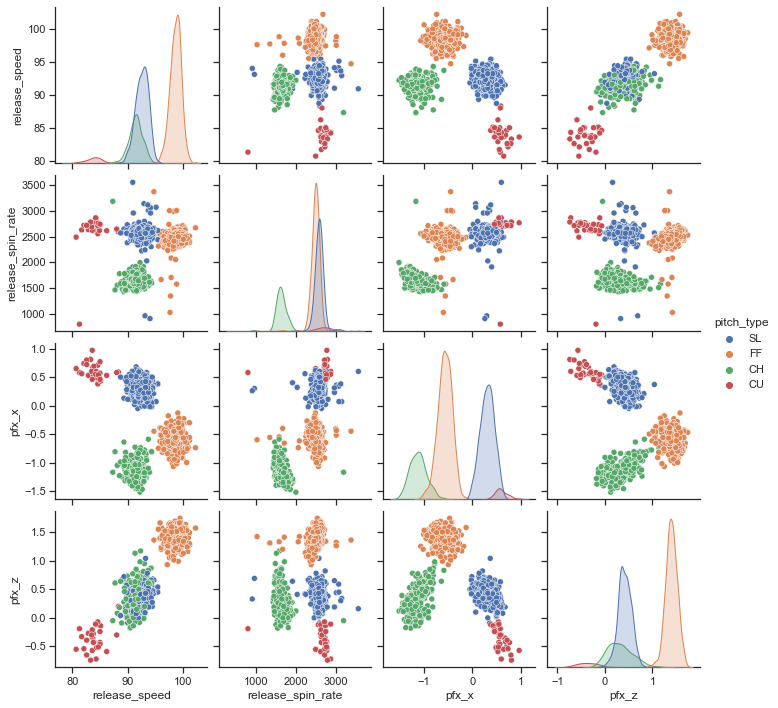

In [16]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(degrom[['pitch_type', 'release_speed', 'release_spin_rate', 'pfx_x', 'pfx_z']], hue='pitch_type')

In [ ]:
g=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
g.map(sns.scatterplot, 'release_speed', 'release_spin_rate');

In [ ]:
h=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
h.map(plt.hist, 'release_speed');